In [1]:
import glob

import pandas as pd
import awkward as ak
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 142.3 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
PATTERN = "/nfs/dust/cms/user/yamralim/cf_cache/hbt_store/analysis_hbt/cf.UniteColumns/run2_2017_nano_uhh_v11/{}/nominal/calib__none/sel__default/prod__z_fractions/dev3_allz/data_*.parquet"

dfs = []

for process_name, df_name in [
    ("dy_lep_m50_amcatnlo", "dy"),
    ("tt_dl_powheg", "tt"),
    ("hh_ggf_bbtautau_madgraph", "hh"),
]:
    for path in glob.glob(PATTERN.format(process_name)):
        data = ak.from_parquet(path, columns=["z_gen_pos", "z_gen_neg", "z_rec_neg", "z_rec_pos", "dm_neg", "dm_pos"])
        df = ak.to_dataframe(data)
        df["process"] = df_name
        dfs.append(df)

df = pd.concat(dfs)

In [3]:
PATTERN = "/nfs/dust/cms/user/yamralim/cf_cache/hbt_store/analysis_hbt/cf.UniteColumns/run2_2017_nano_uhh_v11/{}/nominal/calib__none/sel__default/prod__z_fractions/dev3_allz/data_*.parquet"

dfs2 = []

for process_name, df_name in [
    ("dy_lep_m50_amcatnlo", "dy"),
    ("tt_dl_powheg", "tt"),
    ("hh_ggf_bbtautau_madgraph", "hh"),
]:
    for path in glob.glob(PATTERN.format(process_name)):
        data2 = ak.from_parquet(path, columns=["Tau"])
        df2 = ak.to_dataframe(data2)
        df2["process"] = df_name
        dfs2.append(df2)
    

df2 = pd.concat(dfs2)


In [4]:
PATTERN = "/nfs/dust/cms/user/yamralim/cf_cache/hbt_store/analysis_hbt/cf.UniteColumns/run2_2017_nano_uhh_v11/{}/nominal/calib__none/sel__default/prod__z_fractions/dev3_allz/data_*.parquet"

dfs_rec = []

for process_name, df_name in [
    ("dy_lep_m50_amcatnlo", "dy"),
    ("tt_dl_powheg", "tt"),
    ("hh_ggf_bbtautau_madgraph", "hh"),
]:
    for path in glob.glob(PATTERN.format(process_name)):
        data_rec = ak.from_parquet(path, columns=["tautauNN_regression_output"])
        df_rec = ak.to_dataframe(data_rec)
        df_rec["process"] = df_name
        dfs_rec.append(df_rec)
    

df_rec = pd.concat(dfs_rec)



In [5]:
dfs_gen = []

for process_name, df_name in [
    ("dy_lep_m50_amcatnlo", "dy"),
    ("tt_dl_powheg", "tt"),
    ("hh_ggf_bbtautau_madgraph", "hh"),
]:
    for path in glob.glob(PATTERN.format(process_name)):
        data_gen = ak.from_parquet(path, columns=["tau_nus"])
        df_gen = ak.to_dataframe(data_gen)
        df_gen["process"] = df_name
        dfs_gen.append(df_gen)
    

df_gen = pd.concat(dfs_gen)

In [8]:
p_neg = np.sqrt((df_gen["tau_nus"]["x"][: :1])**2 + (df_gen["tau_nus"]["y"][: :1])**2 + (df_gen["tau_nus"]["z"][: :1])**2)
p_pos = np.sqrt((df_gen["tau_nus"]["x"][: 1:])**2 + (df_gen["tau_nus"]["y"][: 1:])**2 + (df_gen["tau_nus"]["z"][: 1:])**2)

In [9]:
neg = df2["Tau"]["charge"] == -1
pos = df2["Tau"]["charge"] == 1

In [10]:
E_neg = np.sqrt(df2["Tau"]["pt"][neg]**2 + df2["Tau"]["mass"][neg]**2) * np.cosh(df2["Tau"]["eta"][neg]) + p_neg
E_pos = np.sqrt(df2["Tau"]["pt"][pos]**2 + df2["Tau"]["mass"][pos]**2) * np.cosh(df2["Tau"]["eta"][pos]) + p_pos

In [11]:
px_pos = df2["Tau"]["pt"][pos] * np.cos(df2["Tau"]["phi"][pos]) + (df_gen["tau_nus"]["x"][: 1:])
px_neg = df2["Tau"]["pt"][neg] * np.cos(df2["Tau"]["phi"][neg]) + (df_gen["tau_nus"]["x"][: :1])
py_pos = df2["Tau"]["pt"][pos] * np.sin(df2["Tau"]["phi"][pos]) + (df_gen["tau_nus"]["y"][: 1:])
py_neg = df2["Tau"]["pt"][neg] * np.sin(df2["Tau"]["phi"][neg]) + (df_gen["tau_nus"]["y"][: :1])
pz_pos = np.sqrt(df2["Tau"]["pt"][pos]**2 + df2["Tau"]["mass"][pos]**2) * np.sinh(df2["Tau"]["eta"][pos]) + (df_gen["tau_nus"]["z"][: 1:])
pz_neg = np.sqrt(df2["Tau"]["pt"][neg]**2 + df2["Tau"]["mass"][neg]**2) * np.sinh(df2["Tau"]["eta"][neg]) + (df_gen["tau_nus"]["z"][: :1])

In [12]:
# len(list(E_neg))
tau_pos = pd.DataFrame(
    {
        "E_pos": list(E_pos),
        "px_pos": list(px_pos),
        "py_pos": list(py_pos),
        "pz_pos": list(pz_pos),
    },
)

In [13]:
tau_neg = pd.DataFrame(
    {
        "E_neg": list(E_neg),
        "px_neg": list(px_neg),
        "py_neg": list(py_neg),
        "pz_neg": list(pz_neg),
    },
)


In [15]:
m_tautau = np.sqrt((E_neg + E_pos)**2 - ((px_neg + px_pos)**2 + (py_neg + py_pos)**2 + (pz_neg + pz_pos)**2))

In [16]:
px_1 = df_rec["tautauNN_regression_output"][: 0]
py_1 = df_rec["tautauNN_regression_output"][: 1]
pz_1 = df_rec["tautauNN_regression_output"][: 2]
p_1 = np.sqrt(px_1**2 + py_1**2 + pz_1**2)
px_2 = df_rec["tautauNN_regression_output"][: 3]
py_2 = df_rec["tautauNN_regression_output"][: 4]    
pz_2 = df_rec["tautauNN_regression_output"][: 5]
p_2 = np.sqrt(px_2**2 + py_2**2 + pz_2**2)




In [5]:
pz = lambda particle: particle.pt * np.sinh(particle.eta)
px = lambda particle: particle.pt * np.cos(particle.phi)
py = lambda particle: particle.pt * np.sin(particle.phi)

def get_mtt(array):
    # visible lepton sums
    vis_leptons = ak.concatenate([array.Electron, array.Muon, array.Tau], axis=1)[:, [0, 1]]

    vis_px1, vis_px2 = px(vis_leptons[:, 0]), px(vis_leptons[:, 1])
    vis_py1, vis_py2 = py(vis_leptons[:, 0]), py(vis_leptons[:, 1])
    vis_pz1, vis_pz2 = pz(vis_leptons[:, 0]), pz(vis_leptons[:, 1])
    
    vis_p1 = (vis_px1**2 + vis_py1**2 + vis_pz1**2)**0.5
    vis_p2 = (vis_px2**2 + vis_py2**2 + vis_pz2**2)**0.5
    
    vis_e1 = (vis_px1**2 + vis_py1**2 + vis_pz1**2 + vis_leptons[:, 0].mass**2)**0.5
    vis_e2 = (vis_px2**2 + vis_py2**2 + vis_pz2**2 + vis_leptons[:, 1].mass**2)**0.5

    # gen neutrinos
    nu_px = ak.sum(array.tau_nus.x, axis=1)
    nu_py = ak.sum(array.tau_nus.y, axis=1)
    nu_pz = ak.sum(array.tau_nus.z, axis=1)
    nu_e = (nu_px**2 + nu_py**2 + nu_pz**2)**0.5

    # regressed neutrinos
    reg_px = array.tautauNN_regression_output[:, 0] + array.tautauNN_regression_output[:, 3]
    reg_py = array.tautauNN_regression_output[:, 1] + array.tautauNN_regression_output[:, 4]
    reg_pz = array.tautauNN_regression_output[:, 2] + array.tautauNN_regression_output[:, 5]
    reg_e = (reg_px**2 + reg_py**2 + reg_pz**2)**0.5

    # vis + gen nu
    m_tt_gen = (
        (vis_e1 + vis_e2 + nu_e)**2 -
        (vis_px1 + vis_px2 + nu_px)**2 - 
        (vis_py1 + vis_py2 + nu_py)**2 - 
        (vis_pz1 + vis_pz2 + nu_pz)**2
    )**0.5
    
    # vis + reg nu
    m_tt_reg = (
        (vis_e1 + vis_e2 + reg_e)**2 -
        (vis_px1 + vis_px2 + reg_px)**2 - 
        (vis_py1 + vis_py2 + reg_py)**2 - 
        (vis_pz1 + vis_pz2 + reg_pz)**2
    )**0.5

    return m_tt_gen, m_tt_reg

In [6]:
PATTERN = "/nfs/dust/cms/user/yamralim/cf_cache/hbt_store/analysis_hbt/cf.UniteColumns/run2_2017_nano_uhh_v11/{}/nominal/calib__none/sel__default/prod__z_fractions/dev3_allz/data_*.parquet"

dfs = []

z_cols = ["z_gen_pos", "z_gen_neg", "z_rec_neg", "z_rec_pos", "dm_neg", "dm_pos"]
mtt_cols = ["Tau", "Electron", "Muon", "tau_nus", "tautauNN_regression_output"]

for process_name, df_name in [
    ("dy_lep_m50_amcatnlo", "dy"),
    ("tt_dl_powheg", "tt"),
    ("hh_ggf_bbtautau_madgraph", "hh"),
]:
    #print(f"checking {process_name}")
    for path in glob.glob(PATTERN.format(process_name)):
        #print(f"reading {path}")
        data = ak.from_parquet(path, columns=z_cols + mtt_cols + ["category_ids"])
        mtt_gen, mtt_reg = get_mtt(data)
        df = ak.to_dataframe(data[z_cols])
        df["mtt_gen"] = mtt_gen
        df["mtt_reg"] = mtt_reg
        df["process"] = df_name
        dfs.append(df)
df = pd.concat(dfs)

<Axes: xlabel='mtt_reg', ylabel='Density'>

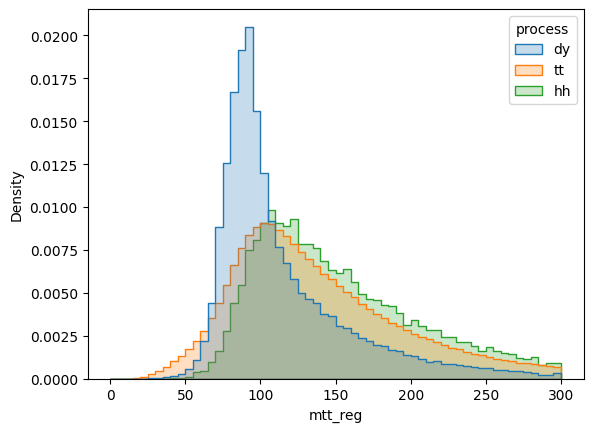

In [6]:
sns.histplot(
    df,
    x="mtt_reg",
    hue="process",
    binrange=(0, 300),
    bins=60,
    stat="density",
    common_norm=False,
    element="step",
)

<Axes: xlabel='mtt_gen', ylabel='Density'>

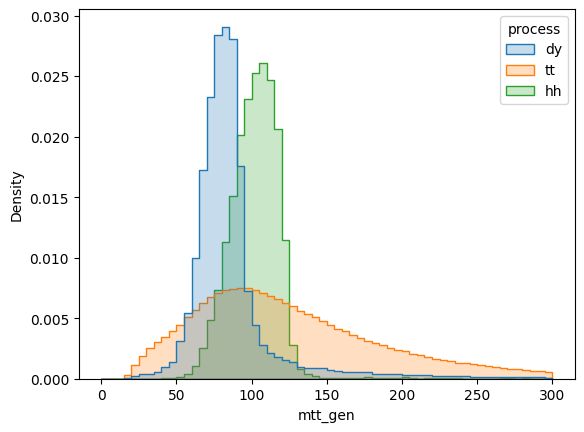

In [7]:
sns.histplot(
    df,
    x="mtt_gen",
    hue="process",
    binrange=(0, 300),
    bins=60,
    stat="density",
    common_norm=False,
    element="step",
)


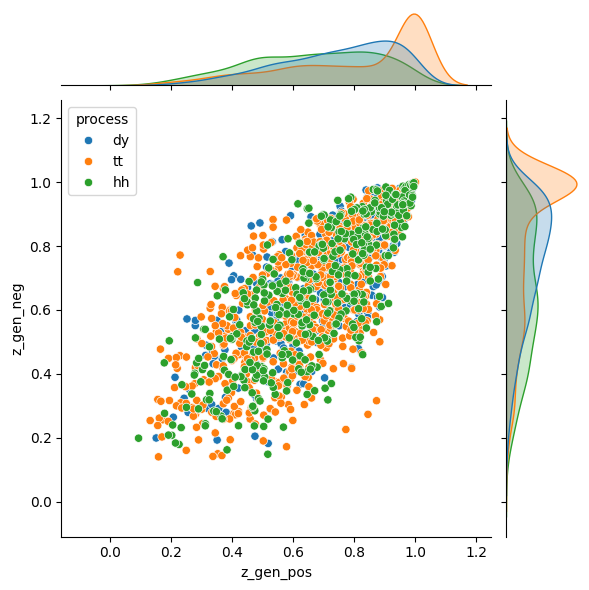

In [22]:
x=sns.jointplot(
    # data=df,
    data=df[(df["dm_pos"] == 0) & (df["dm_neg"] == 0)],
    x="z_gen_pos",
    y="z_gen_neg",
    hue="process",
    kind="scatter", 
    marginal_kws=dict(common_norm=False),
    #joint_kws=dict(
        #common_norm=False, 
        #bw_adjust=0.5,
        #levels=3,
        #alpha=0.5, 
        #fill=False,
    #),
)
sns.move_legend(x.ax_joint,"upper left")

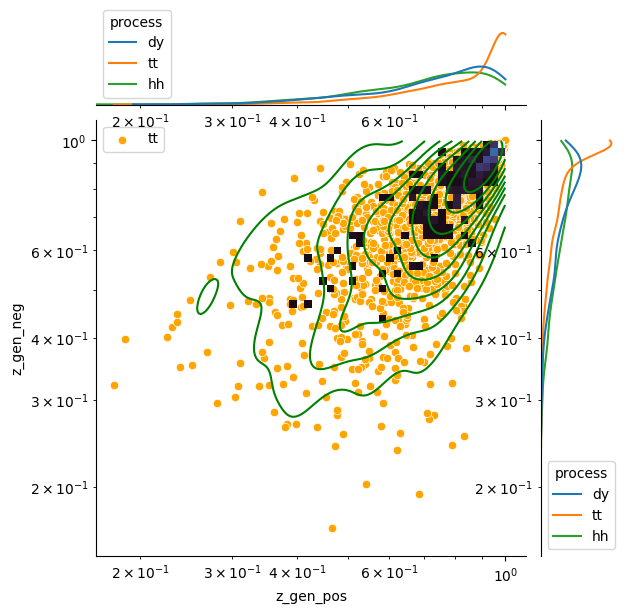

In [7]:
# Filter the main data
filtered_df = df[(df["dm_pos"] == 10) & (df["dm_neg"] == 1)]

# Normalize the data to the range of [0, 1]
filtered_df["z_gen_pos"] = filtered_df["z_gen_pos"].clip(0, 1)
filtered_df["z_gen_neg"] = filtered_df["z_gen_neg"].clip(0, 1)

# Create the joint plot
g = sns.JointGrid(
    data=filtered_df,
    x="z_gen_pos",
    y="z_gen_neg",
    hue="process",
)

# Scatter plot for tt
sns.scatterplot(
 data=filtered_df[filtered_df["process"] == "tt"],
    x="z_gen_pos",
    y="z_gen_neg",
    ax=g.ax_joint,
    label="tt",
    color="orange"
)

# KDE plot for hh
sns.kdeplot(
    data=filtered_df[filtered_df["process"] == "hh"],
    x="z_gen_pos",
    y="z_gen_neg",
    ax=g.ax_joint,
    label="hh",
    fill=False,
    log_scale=True,
    color="green",
    cut=0
)

# Hist plot for dy
sns.histplot(
    data=filtered_df[filtered_df["process"] == "dy"],
    x="z_gen_pos",
    y="z_gen_neg",
    ax=g.ax_joint,
    label="dy",
    bins=50,
    pthresh=.1,
    cmap="mako"
)

# Marginal KDE plots
sns.kdeplot(
    data=filtered_df,
    x="z_gen_pos",
    hue="process",
    ax=g.ax_marg_x,
    common_norm=False,
    log_scale=True,
    cut=0
)
sns.kdeplot(
    data=filtered_df,
    y="z_gen_neg",
    hue="process",
    ax=g.ax_marg_y,
    common_norm=False,
    log_scale=True,
    cut=0
)

# Add legend
g.ax_joint.legend()

# Adjust the legend position
sns.move_legend(g.ax_joint, "upper left")

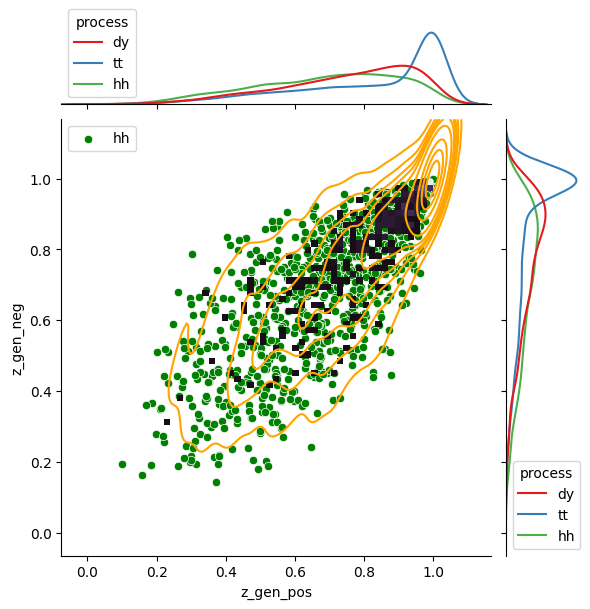

In [5]:
# Filter the main data
filtered_df = df[(df["dm_pos"] == 1) & (df["dm_neg"] == 0)]

# Normalize the data to the range of [0, 1]
filtered_df["z_gen_pos"] = filtered_df["z_gen_pos"].clip(0, 1)
filtered_df["z_gen_neg"] = filtered_df["z_gen_neg"].clip(0, 1)

# Create the joint plot
g = sns.JointGrid(
    data=filtered_df,
    x="z_gen_pos",
    y="z_gen_neg",
)

# Scatter plot for hh
sns.scatterplot(
    data=filtered_df[filtered_df["process"] == "hh"],
    x="z_gen_pos",
    y="z_gen_neg",
    ax=g.ax_joint,
    label="tt",
    color="green"
)

# KDE plot for hh
sns.kdeplot(
    data=filtered_df[filtered_df["process"] == "hh"],
    x="z_gen_pos",
    y="z_gen_neg",
    ax=g.ax_joint,
    label="hh",
    fill=False,
    color="green"
)

# Hist plot for dy
sns.histplot(
    data=filtered_df[filtered_df["process"] == "dy"],
    x="z_gen_pos",
    y="z_gen_neg",
    ax=g.ax_joint,
    label="dy",
    bins=50,
    pthresh=.1,
    cmap="mako"
)

# Marginal KDE plots
sns.kdeplot(
    data=filtered_df,
    x="z_gen_pos",
    hue="process",
    ax=g.ax_marg_x,
    common_norm=False,
    palette="Set1"
)
sns.kdeplot(
    data=filtered_df,
    y="z_gen_neg",
    hue="process",
    ax=g.ax_marg_y,
    common_norm=False,
    palette="Set1"
)

# Add legends for each plot
handles, labels = g.ax_joint.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles)).items()
g.ax_joint.legend(handles=[handle for label, handle in unique_labels], labels=[label for label, handle in unique_labels], loc="upper left")



<Axes: xlabel='z_gen_pos', ylabel='Count'>

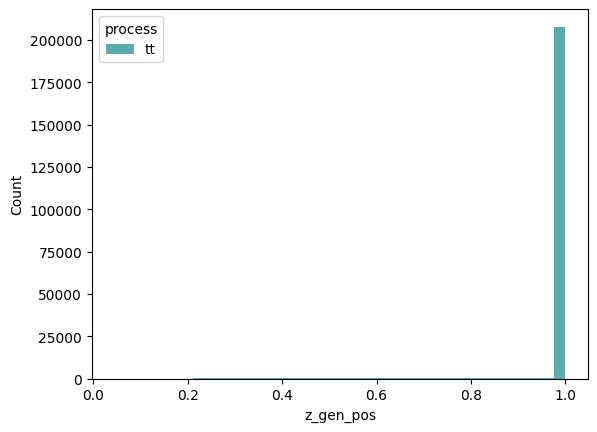

In [50]:
# Filter the main data
filtered_df = df[(df["dm_pos"] == 0)] 
#& (df["dm_neg"] == 0)]

sns.histplot(
   data=filtered_df[filtered_df["process"]== "tt"],
    x="z_gen_pos",
    #y="z_gen_neg",
    hue="process",
    fill=True,
    common_norm=False,
    palette="viridis",
    bins=40,
    pthresh=.1,
    alpha=.75,
    linewidth=0,
    #stat="density"
)

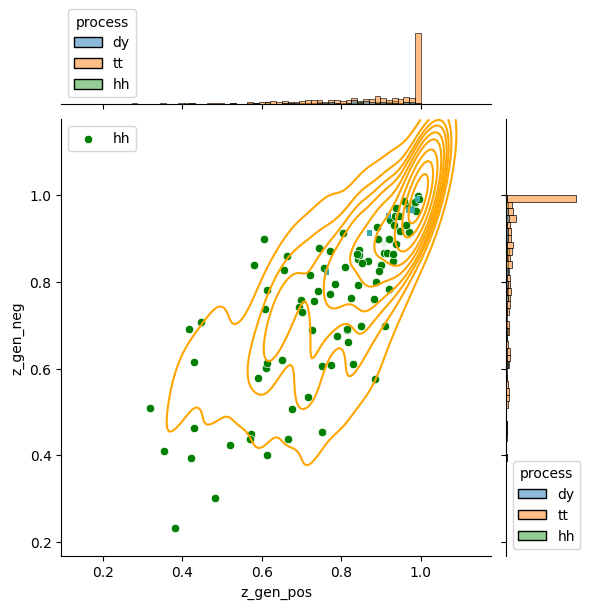

In [28]:
# Filter the main data
filtered_df = df[(df["dm_pos"] == 11) & (df["dm_neg"] == 10)]

# Normalize the data to the range of [0, 1]
filtered_df["z_gen_pos"] = filtered_df["z_gen_pos"].clip(0, 1)
filtered_df["z_gen_neg"] = filtered_df["z_gen_neg"].clip(0, 1)

# Create the joint plot
g = sns.JointGrid(
    data=filtered_df,
    x="z_gen_pos",
    y="z_gen_neg",
    hue="process",
)

# Scatter plot for hh
sns.scatterplot(
    data=filtered_df[filtered_df["process"] == "hh"],
    x="z_gen_pos",
    y="z_gen_neg",
    ax=g.ax_joint,
    label="hh",
    color="green"
)

# KDE plot for tt
sns.kdeplot(
    data=filtered_df[filtered_df["process"] == "tt"],
    x="z_gen_pos",
    y="z_gen_neg",
    ax=g.ax_joint,
    label="tt",
    fill=False,
    color="orange"
)

# Hist plot for dy
sns.histplot(
    data=filtered_df[filtered_df["process"] == "dy"],
    x="z_gen_pos",
    y="z_gen_neg",
    ax=g.ax_joint,
    label="dy",
    bins=50

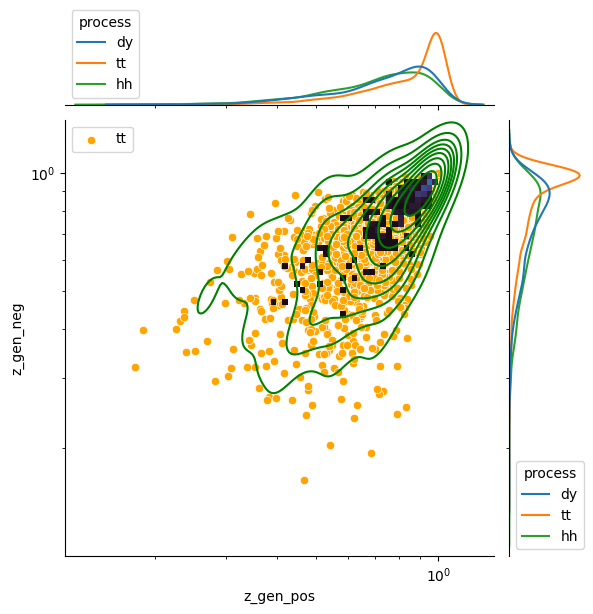

In [4]:
# Filter the main data
filtered_df = df[(df["dm_pos"] == 10) & (df["dm_neg"] == 1)]

# Normalize the data to the range of [0, 1]
filtered_df["z_gen_pos"] = filtered_df["z_gen_pos"].clip(0, 1)
filtered_df["z_gen_neg"] = filtered_df["z_gen_neg"].clip(0, 1)

# Create the joint plot
g = sns.JointGrid(
    data=filtered_df,
    x="z_gen_pos",
    y="z_gen_neg",
    hue="process",
)

# Scatter plot for tt
sns.scatterplot(
 data=filtered_df[filtered_df["process"] == "tt"],
    x="z_gen_pos",
    y="z_gen_neg",
    ax=g.ax_joint,
    label="tt",
    color="orange"
)

# KDE plot for hh
sns.kdeplot(
    data=filtered_df[filtered_df["process"] == "hh"],
    x="z_gen_pos",
    y="z_gen_neg",
    ax=g.ax_joint,
    label="hh",
    fill=False,
    log_scale=True,
    color="green"
)

# Hist plot for dy
sns.histplot(
    data=filtered_df[filtered_df["process"] == "dy"],
    x="z_gen_pos",
    y="z_gen_neg",
    ax=g.ax_joint,
    label="dy",
    bins=50,
    pthresh=.1,
    cmap="mako"
)

# Marginal KDE plots
sns.kdeplot(
    data=filtered_df,
    x="z_gen_pos",
    hue="process",
    ax=g.ax_marg_x,
    common_norm=False,
    log_scale=True
)
sns.kdeplot(
    data=filtered_df,
    y="z_gen_neg",
    hue="process",
    ax=g.ax_marg_y,
    common_norm=False,
    log_scale=True
)

# Add legend
g.ax_joint.legend()

# Adjust the legend position
sns.move_legend(g.ax_joint, "upper left")

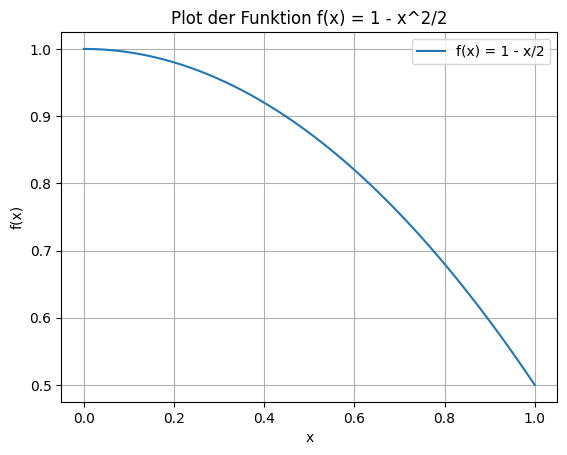

In [4]:
x = np.linspace(0, 1, 1000)
def f(x):
    return 1 - x**2 / 2
y= f(x) 
plt.plot(x, y, label='f(x) = 1 - x/2')

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot der Funktion f(x) = 1 - x^2/2')

# Legende hinzufügen
plt.legend()

# Gitter hinzufügen
plt.grid(True)

# Plot anzeigen
plt.show()
    

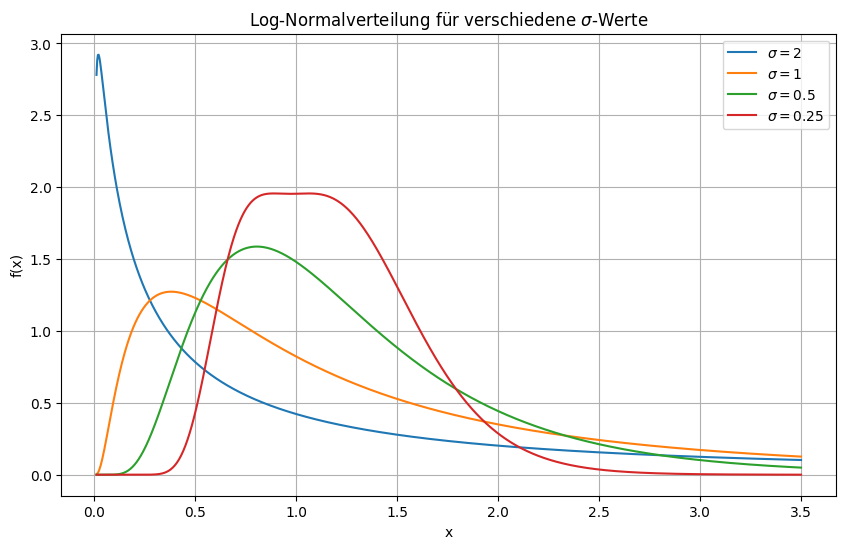

In [5]:
# Log-Normalverteilungsfunktion
def log_normal(x, mu, sigma):
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))
def kde(x, mu, sigma):
    return log_normal(x*0.75, mu, sigma) + log_normal(x*1.25, mu, sigma)

# Werte für mu und verschiedene sigma
mu = 0
sigma_values = [2, 1, 0.5, 0.25]

# Bereich für x-Werte von 0.01 bis 1 (außer 0, da ln(0) nicht definiert ist)
x = np.linspace(0.01, 3.5, 1000)

# Plot erstellen
plt.figure(figsize=(10, 6))

for sigma in sigma_values:
    y = kde(x, mu, sigma)
    plt.plot(x, y, label=f'$\sigma={sigma}$')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Log-Normalverteilung für verschiedene $\sigma$-Werte')
plt.legend()
plt.grid(True)
plt.show()

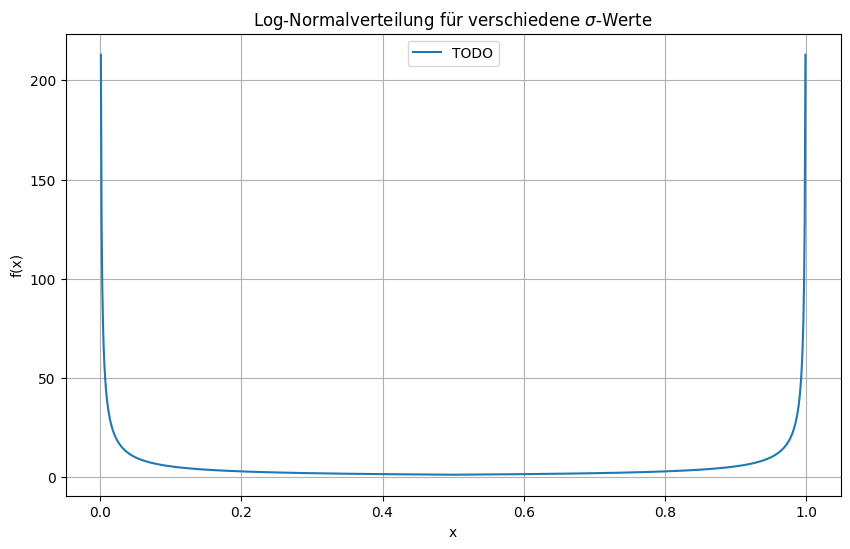

In [6]:
# Log-Normalverteilungsfunktion
def log_normal(x, mu, sigma):
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

def get_sigma(mu):
    return 5

def kde(x):
    z_values = [0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75]  # will be a long list
    result = np.empty(len(x), dtype=np.float32)
    left = x <= 0.5
    result[left] = sum(log_normal(x[left], z, get_sigma(z)) for z in z_values)
    result[~left] = sum(log_normal(1 - x[~left], z, get_sigma(z)) for z in z_values)
    return result

# Bereich für x-Werte von 0.01 bis 1 (außer 0, da ln(0) nicht definiert ist)
x = np.linspace(0, 1, 1000)

# Plot erstellen
plt.figure(figsize=(10, 6))

plt.plot(x, kde(x), label=f'TODO')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Log-Normalverteilung für verschiedene $\sigma$-Werte')
plt.legend()
plt.grid(True)
plt.show()

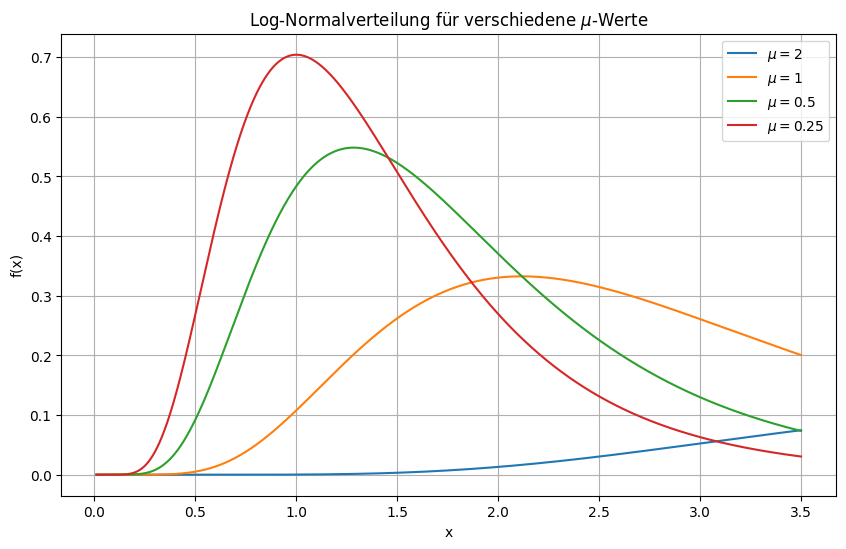

In [7]:
# Log-Normalverteilungsfunktion
def log_normal(x, mu, sigma):
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))
def kde(x, mu, sigma):
    return log_normal(x*0.75, mu, sigma) + log_normal(x*1.25, mu, sigma)

# Werte für sigma und verschiedene mu werte
mu_values = [2, 1, 0.5, 0.25]
sigma = 0.5

# Bereich für x-Werte von 0.01 bis 1 (außer 0, da ln(0) nicht definiert ist)
x = np.linspace(0.01, 3.5, 1000)

# Plot erstellen
plt.figure(figsize=(10, 6))

for mu in mu_values:
    y = log_normal(x, mu, sigma)
    plt.plot(x, y, label=f'$\mu={mu}$')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Log-Normalverteilung für verschiedene $\mu$-Werte')
plt.legend()
plt.grid(True)
plt.show()

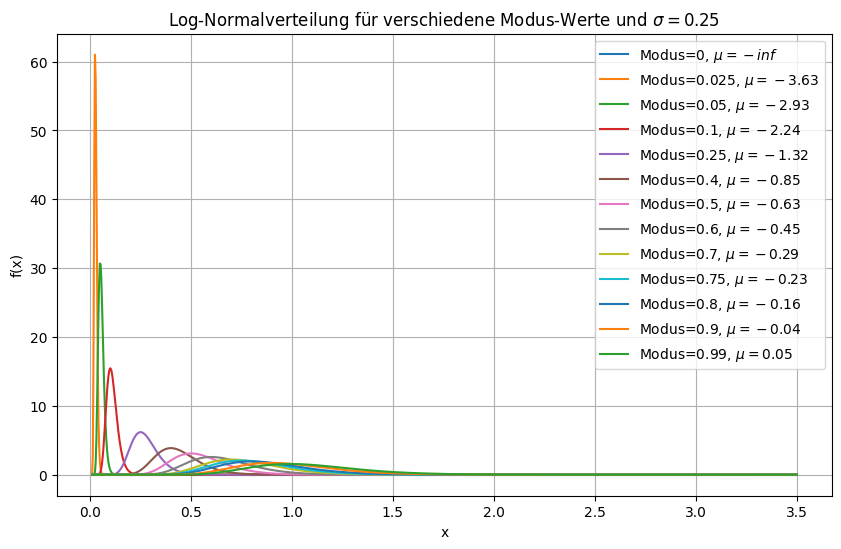

In [4]:
# Log-Normalverteilungsfunktion
def log_normal(x, mu, sigma):
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

# Berechne mu aus dem Modus und sigma
def calculate_mu(modus, sigma):
    return np.log(modus) + sigma**2

# Werte für modus und sigma
modus_values = [0, 0.025, 0.05, 0.1,0.25, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]
sigma = 0.25  # kleiner sigma-Wert

# Bereich für x-Werte von 0.01 bis 3.5 (außer 0, da ln(0) nicht definiert ist)
x = np.linspace(0.01, 3.5, 1000)

# Plot erstellen
plt.figure(figsize=(10, 6))

for modus in modus_values:
    mu = calculate_mu(modus, sigma)
    y = log_normal(x, mu, sigma)
    plt.plot(x, y, label=f'Modus={modus}, $\mu={mu:.2f}$')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Log-Normalverteilung für verschiedene Modus-Werte und $\sigma=0.25$')
plt.legend()
plt.grid(True)
plt.show()

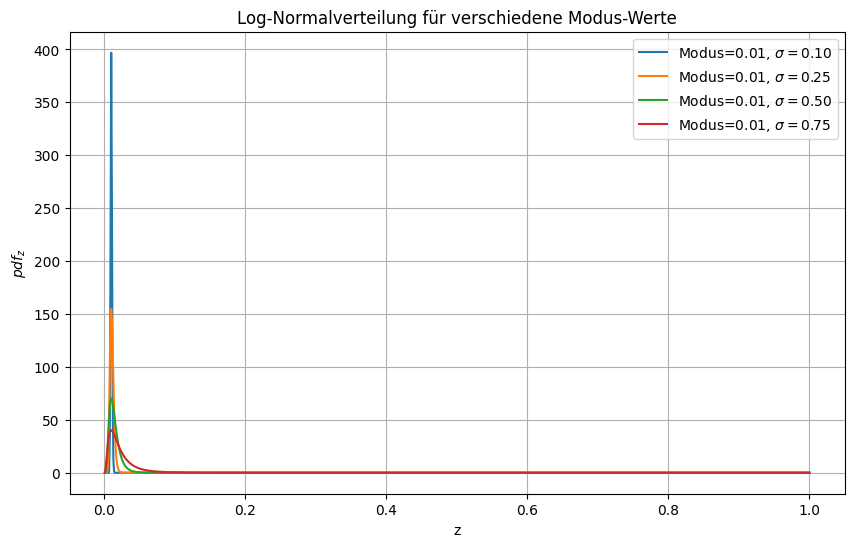

In [11]:
# Log-Normalverteilungsfunktion
def log_normal(x, mu, sigma):
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

# Berechne mu aus dem Modus und sigma
def calculate_mu(modus, sigma):
    return np.log(modus) + sigma**2

# Werte für modus und sigma
modus = 0.01
sigma_values = [0.1, 0.25, 0.5, 0.75]
#sigma_values = [0.75]

# Bereich für x-Werte von 0.01 bis 3.5 (außer 0, da ln(0) nicht definiert ist)
x = np.linspace(0.0, 1.0, 1000)

# Plot erstellen
plt.figure(figsize=(10, 6))

for sigma in sigma_values:
    mu = calculate_mu(modus, sigma)
    y = log_normal(x, mu, sigma)
    plt.plot(x, y, label=f'Modus={modus}, $\sigma={sigma:.2f}$')

# central pdf
#central_sigma = 0.03
#mu = calculate_mu(modus=0.5, sigma=central_sigma)
#y = log_normal(x, mu, central_sigma)
#plt.plot(x, y, label=f'Modus={0.5}, $\sigma={central_sigma:.2f}$')

plt.xlabel('z')
plt.ylabel('$pdf_{z}$')
plt.title('Log-Normalverteilung für verschiedene Modus-Werte')
plt.legend()
plt.grid(True)
plt.show()

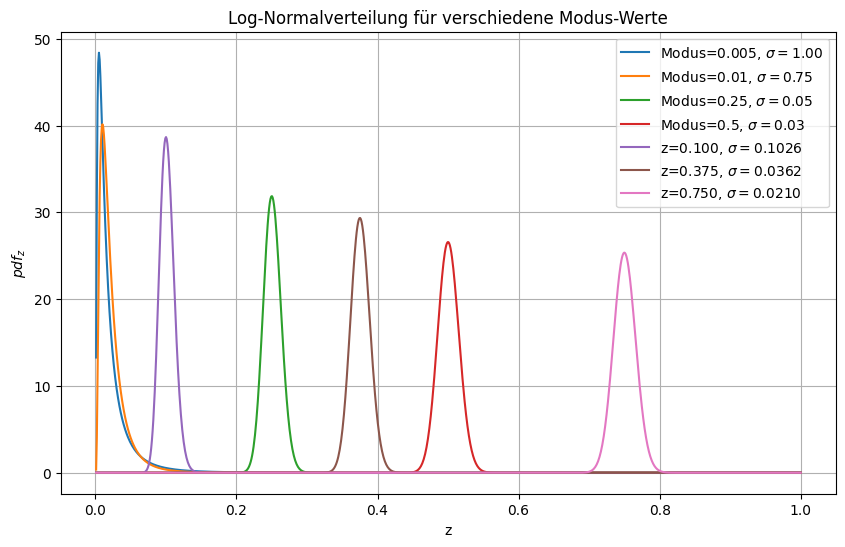

In [4]:
# Log-Normalverteilungsfunktion
def log_normal(x, mu, sigma):
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

# Berechne mu aus dem Modus und sigma
def calculate_mu(modus, sigma):
    return np.log(modus) + sigma**2

# Werte für modus und sigma
#modus = 0.01
# sigma_values = [0.1, 0.25, 0.5, 0.75]
#sigma_values = [0.75]

# Bereich für x-Werte von 0.01 bis 3.5 (außer 0, da ln(0) nicht definiert ist)
x = np.linspace(0.0, 1.0, 1000)

# Plot erstellen
plt.figure(figsize=(10, 6))

mu = calculate_mu(modus=0.005, sigma=1.0)
y = log_normal(x, mu, sigma=1.0)
plt.plot(x, y, label=f'Modus={0.005}, $\sigma={1.0:.2f}$')

mu = calculate_mu(modus=0.01, sigma=0.75)
y = log_normal(x, mu, sigma=0.75)
plt.plot(x, y, label=f'Modus={0.01}, $\sigma={0.75:.2f}$')

# central pdf
mid_sigma = 0.05
mu = calculate_mu(modus=0.25, sigma=mid_sigma)
y = log_normal(x, mu, mid_sigma)
plt.plot(x, y, label=f'Modus={0.25}, $\sigma={mid_sigma:.2f}$')

central_sigma = 0.03
mu = calculate_mu(modus=0.5, sigma=central_sigma)
y = log_normal(x, mu, central_sigma)
plt.plot(x, y, label=f'Modus={0.5}, $\sigma={central_sigma:.2f}$')


def sigma_func(z):
    a, b = 0.01671513800492873, -0.7880525635296838
    return a * z**b

def mu_sigma_func(z):
    sigma = sigma_func(z)
    mu = np.log(z) + sigma**2
    return mu, sigma

def plot_pdf(z, x):
    mu, sigma = mu_sigma_func(z)
    y = log_normal(x, mu, sigma)
    plt.plot(x, y, label=f'z={z:.3f}, $\sigma={sigma:.4f}$')

plot_pdf(0.1, x)
plot_pdf(0.375, x)
plot_pdf(0.75, x)

plt.xlabel('z')
plt.ylabel('$pdf_{z}$')
plt.title('Log-Normalverteilung für verschiedene Modus-Werte')
plt.legend()
plt.grid(True)
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

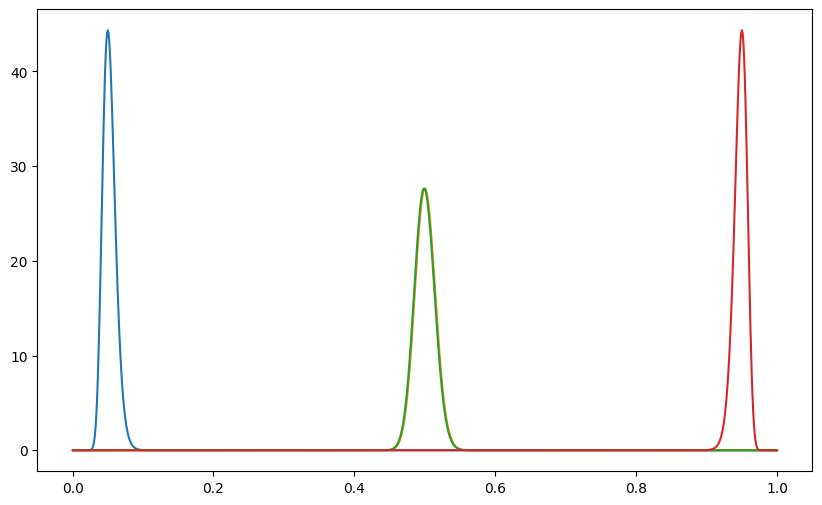

In [5]:
# Log-Normalverteilungsfunktion
def log_normal(x, mu, sigma):
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

# Berechne mu aus dem Modus und sigma
def calculate_mu(modus, sigma):
    return np.log(modus) + sigma**2

# Werte für modus und sigma
#modus = 0.01
# sigma_values = [0.1, 0.25, 0.5, 0.75]
#sigma_values = [0.75]

# Bereich für x-Werte von 0.01 bis 3.5 (außer 0, da ln(0) nicht definiert ist)
x = np.linspace(0.0, 1.0, 1000)

# Plot erstellen
plt.figure(figsize=(10, 6))

if 0:
    mu = calculate_mu(modus=0.005, sigma=1.0)
    y = log_normal(x, mu, sigma=1.0)
    plt.plot(x, y, label=f'Modus={0.005}, $\sigma={1.0:.2f}$')
    
    mu = calculate_mu(modus=0.01, sigma=0.75)
    y = log_normal(x, mu, sigma=0.75)
    plt.plot(x, y, label=f'Modus={0.01}, $\sigma={0.75:.2f}$')
    
    # central pdf
    mid_sigma = 0.05
    mu = calculate_mu(modus=0.25, sigma=mid_sigma)
    y = log_normal(x, mu, mid_sigma)
    plt.plot(x, y, label=f'Modus={0.25}, $\sigma={mid_sigma:.2f}$')
    
    central_sigma = 0.03
    mu = calculate_mu(modus=0.5, sigma=central_sigma)
    y = log_normal(x, mu, central_sigma)
    plt.plot(x, y, label=f'Modus={0.5}, $\sigma={central_sigma:.2f}$')


def sigma_func(z):
    a, b = 0.01671513800492873, -0.7880525635296838
    return a * z**b

def mu_sigma_func(z):
    sigma = sigma_func(z)
    mu = np.log(z) + sigma**2
    return mu, sigma

def plot_pdf(z, x):
    mu, sigma = mu_sigma_func(z if z <= 0.5 else (1 - z))
    y = log_normal(x if z <= 0.5 else (1 - x), mu, sigma)
    plt.plot(x, y, label=f'z={z:.3f}, $\sigma={sigma:.4f}$')

plot_pdf(0.05, x)
plot_pdf(0.5, x)
plot_pdf(0.499, x)
plot_pdf(0.95, x)

def kde(z_vals):
    mu_sigma_pairs = [mu_sigma_func(z) for z in z_vals]
    def func(x):
        return sum([
            log_normal(x if x <= 0.5 else (1 - x), mu, sigma)
            for mu, sigma in mu_sigma_pairs
        ])
    return func

def plot_kde(z_vals, x):
    y = kde(z_vals)(x)
    plt.plot(x, y, label=f'KDE for {len(z_vals)} values')

plot_kde([*(30 * [0.00001]), 0.1, 0.2, 0.3, 0.34, 0.35, 0.7, 0.9, 0.9, 0.95, 0.998, 1.0], x)

plt.xlabel('z')
plt.ylabel('$pdf_{z}$')
plt.title('Log-Normalverteilung für verschiedene Modus-Werte')
plt.legend()
plt.grid(True)
plt.show()

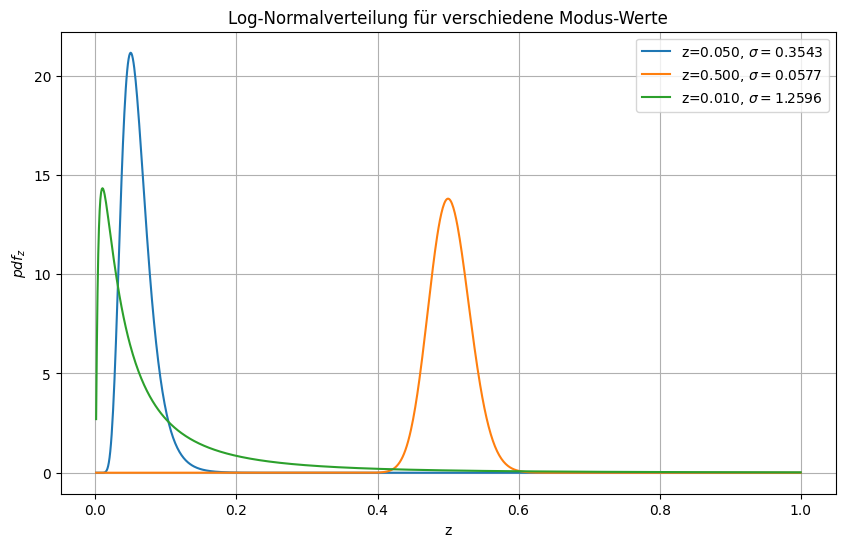

In [6]:
# Log-Normalverteilungsfunktion
def log_normal(x, mu, sigma):
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

# Berechne mu aus dem Modus und sigma
def calculate_mu(modus, sigma):
    return np.log(modus) + sigma**2

# Werte für modus und sigma
#modus = 0.01
# sigma_values = [0.1, 0.25, 0.5, 0.75]
#sigma_values = [0.75]

# Bereich für x-Werte von 0.01 bis 3.5 (außer 0, da ln(0) nicht definiert ist)
x = np.linspace(0.0, 1.0, 1000)

# Plot erstellen
plt.figure(figsize=(10, 6))


def sigma_func(z):
    a, b = 0.01671513800492873, -0.7880525635296838
    return a * z**b *2

def mu_sigma_func(z):
    sigma = sigma_func(z)
    mu = np.log(z) + sigma**2
    return mu, sigma

def plot_pdf(z, x):
    assert z<= 0.5
    mu, sigma = mu_sigma_func(z)
    y = log_normal(x, mu, sigma)
    plt.plot(x, y, label=f'z={z:.3f}, $\sigma={sigma:.4f}$')

plot_pdf(0.05, x)
plot_pdf(0.5, x)

plot_pdf(0.01, x)




plt.xlabel('z')
plt.ylabel('$pdf_{z}$')
plt.title('Log-Normalverteilung für verschiedene Modus-Werte')
plt.legend()
plt.grid(True)
plt.show()

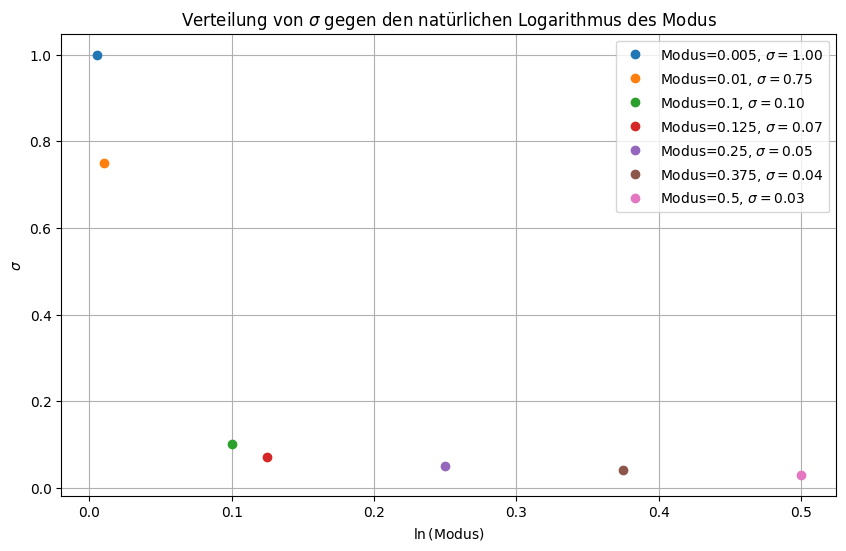

In [23]:
# Log-Normalverteilungsfunktion
def log_normal(x, mu, sigma):
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

# Berechne mu aus dem Modus und sigma
def calculate_mu(modus, sigma):
    return np.log(modus) + sigma**2

# Werte für Modus und Sigma
modus_values = [0.005, 0.01, 0.1, 0.125, 0.25, 0.375, 0.5]
sigma_values = [1.0, 0.75, 0.1, 0.07, 0.05, 0.04, 0.03]

# Bereich für x-Werte von 0.01 bis 3.5 (außer 0, da ln(0) nicht definiert ist)


# Plot erstellen
plt.figure(figsize=(10, 6))

for modus, sigma in zip(modus_values, sigma_values):
    mu = calculate_mu(modus, sigma)
    y = sigma
    plt.plot(modus, y, 'o', label=f'Modus={modus}, $\\sigma={sigma:.2f}$')

plt.xlabel('$\\ln$(Modus)')
plt.ylabel('$\\sigma$')
plt.title('Verteilung von $\\sigma$ gegen den natürlichen Logarithmus des Modus')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
!pip install scipy


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 171.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


0.01671513800492873 -0.7880525635296838


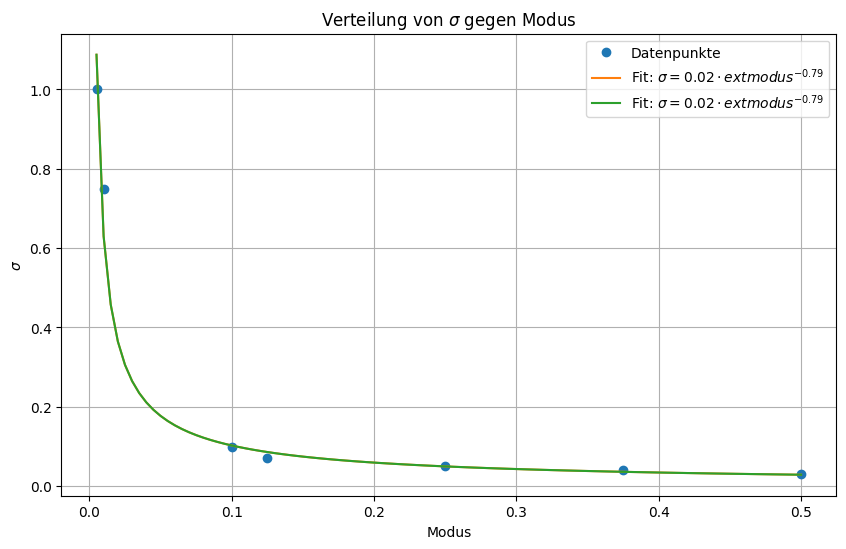

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Log-Normalverteilungsfunktion
def log_normal(x, mu, sigma):
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

# Berechne mu aus dem Modus und sigma
def calculate_mu(modus, sigma):
    return np.log(modus) + sigma**2

# Werte für Modus und Sigma
modus_values = np.array([0.005, 0.01, 0.1, 0.125, 0.25, 0.375, 0.5])
sigma_values = np.array([1.0, 0.75, 0.1, 0.07, 0.05, 0.04, 0.03])

# Potenzfunktion für die Kurvenanpassung
def power_function(modus, a, b):
    return a * modus**b

# Logarithmische Anpassung für die Potenzfunktion durchführen
log_modus_values = np.log(modus_values)
log_sigma_values = np.log(sigma_values)
coefficients = np.polyfit(log_modus_values, log_sigma_values, 1)
b, log_a = coefficients
a = np.exp(log_a)

# Fit-Kurve berechnen
fit_sigma_values = power_function(modus_values, a, b)

# Plot erstellen
plt.figure(figsize=(10, 6))

# Datenpunkte plotten
plt.plot(modus_values, sigma_values, 'o', label='Datenpunkte')

# Fit-Kurve plotten
x_fit = np.linspace(min(modus_values), max(modus_values), 100)
y_fit = power_function(x_fit, a, b)
print (a,b) 
plt.plot(x_fit, y_fit, '-', label=f'Fit: $\\sigma = {a:.2f} \cdot \text{{modus}}^{{{b:.2f}}}$')
y_2 = a*np.exp(np.log(x_fit)* b)
plt.plot(x_fit, y_2, '-', label=f'Fit: $\\sigma = {a:.2f} \cdot \text{{modus}}^{{{b:.2f}}}$')
plt.xlabel('Modus')
plt.ylabel('$\\sigma$')
plt.title('Verteilung von $\\sigma$ gegen Modus')
plt.legend()
plt.grid(True)
plt.show()


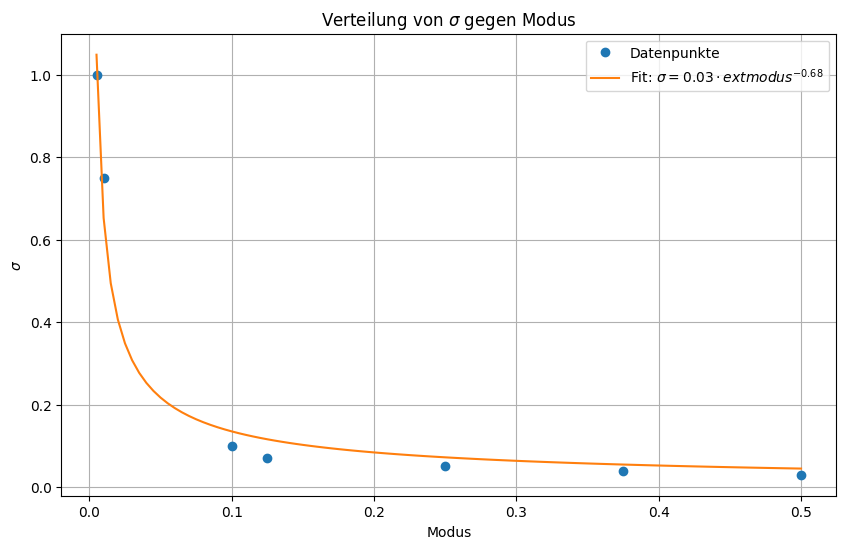

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Log-Normalverteilungsfunktion
def log_normal(x, mu, sigma):
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

# Berechne mu aus dem Modus und sigma
def calculate_mu(modus, sigma):
    return np.log(modus) + sigma**2

# Werte für Modus und Sigma
modus_values = np.array([0.005, 0.01, 0.1, 0.125, 0.25, 0.375, 0.5])
sigma_values = np.array([1.0, 0.75, 0.1, 0.07, 0.05, 0.04, 0.03])

# Potenzfunktion für die Kurvenanpassung
def power_function(modus, a, b):
    return a * modus**b

# Kurvenanpassung durchführen
params, covariance = curve_fit(power_function, modus_values, sigma_values)
a, b = params

# Fit-Kurve berechnen
fit_sigma_values = power_function(modus_values, a, b)

# Plot erstellen
plt.figure(figsize=(10, 6))

# Datenpunkte plotten
plt.plot(modus_values, sigma_values, 'o', label='Datenpunkte')

# Fit-Kurve plotten
x_fit = np.linspace(min(modus_values), max(modus_values), 100)
y_fit = power_function(x_fit, a, b)
plt.plot(x_fit, y_fit, '-', label=f'Fit: $\\sigma = {a:.2f} \cdot \text{{modus}}^{{{b:.2f}}}$')

plt.xlabel('Modus')
plt.ylabel('$\\sigma$')
plt.title('Verteilung von $\\sigma$ gegen Modus')
plt.legend()
plt.grid(True)
plt.show()


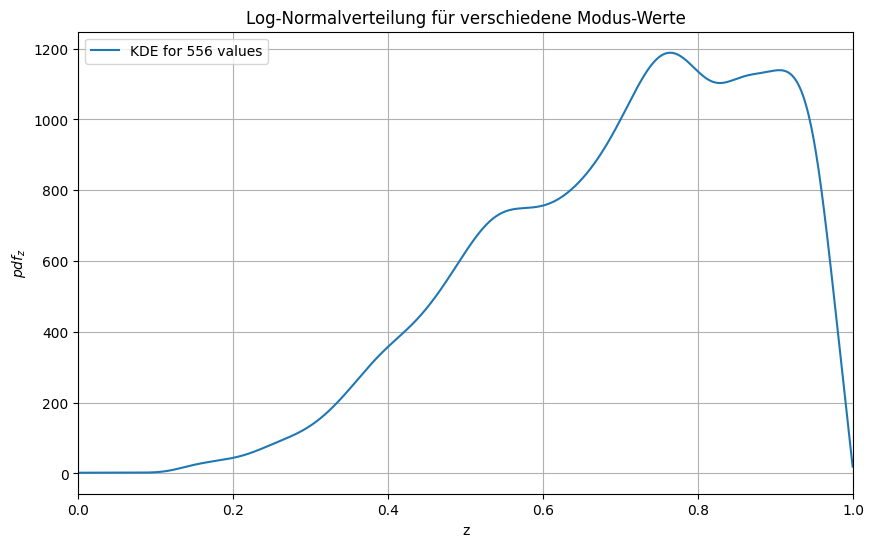

In [54]:
# Filter the main data
filtered_df = df[(df["dm_pos"] == 10) & (df["dm_neg"] == 1)]

# Normalize the data to the range of [0, 1]
filtered_df["z_gen_pos"] = filtered_df["z_gen_pos"].clip(0, 1)
filtered_df["z_gen_neg"] = filtered_df["z_gen_neg"].clip(0, 1)


# Log-Normalverteilungsfunktion
def log_normal(x, mu, sigma):
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

# Berechne mu aus dem Modus und sigma
def calculate_mu(modus, sigma):
    return np.log(modus) + sigma**2

# Werte für modus und sigma
#modus = 0.01
# sigma_values = [0.1, 0.25, 0.5, 0.75]
#sigma_values = [0.75]

# Bereich für x-Werte von 0.01 bis 3.5 (außer 0, da ln(0) nicht definiert ist)
x = np.linspace(0.0, 1.0, 1000)

# Plot erstellen
plt.figure(figsize=(10, 6))

if 0:
    mu = calculate_mu(modus=0.005, sigma=1.0)
    y = log_normal(x, mu, sigma=1.0)
    plt.plot(x, y, label=f'Modus={0.005}, $\sigma={1.0:.2f}$')
    
    mu = calculate_mu(modus=0.01, sigma=0.75)
    y = log_normal(x, mu, sigma=0.75)
    plt.plot(x, y, label=f'Modus={0.01}, $\sigma={0.75:.2f}$')
    
    # central pdf
    mid_sigma = 0.05
    mu = calculate_mu(modus=0.25, sigma=mid_sigma)
    y = log_normal(x, mu, mid_sigma)
    plt.plot(x, y, label=f'Modus={0.25}, $\sigma={mid_sigma:.2f}$')
    
    central_sigma = 0.03
    mu = calculate_mu(modus=0.5, sigma=central_sigma)
    y = log_normal(x, mu, central_sigma)
    plt.plot(x, y, label=f'Modus={0.5}, $\sigma={central_sigma:.2f}$')


def sigma_func(z):
    a, b = 0.01671513800492873, -0.7880525635296838
    return a * z**b *3

#def mu_sigma_func(z):
#    sigma = sigma_func(z)
#    mu = np.log(z) + sigma**2
#    return mu, sigma

#def plot_pdf(z, x):
#    mu, sigma = mu_sigma_func(z if z <= 0.5 else (1 - z))
#    y = log_normal(x if z <= 0.5 else (1 - x), mu, sigma)
#    plt.plot(x, y, label=f'z={z:.3f}, $\sigma={sigma:.4f}$')

#plot_pdf(0.05, x)
#plot_pdf(0.5, x)
#plot_pdf(0.499, x)
#plot_pdf(0.95, x)

def kde(z_vals):
    def func(x):
        values = []
        for z in z_vals:
            if z <= 0.5:
                sigma = sigma_func(z)
                mu = np.log(z) + sigma**2
                values.append(log_normal(x, mu, sigma))
            else:
                sigma = sigma_func(1 - z)
                mu = np.log(1 - z) + sigma**2
                vals = log_normal(-(x - (1 - z)) + z, mu, sigma)
                values.append(vals)
        return sum(values)
    return func

def plot_kde(z_vals, x):
    y = kde(z_vals)(x)
    plt.plot(x, y, label=f'KDE for {len(z_vals)} values')

# plot_kde([*(30 * [0.00001]), 0.1, 0.2, 0.3, 0.34, 0.35, 0.7, 0.9, 0.9, 0.95, 0.998, 1.0], x)
plot_kde(filtered_df[filtered_df["process"] == "hh"]["z_gen_pos"].tolist(), x)

plt.xlim((0, 1))
plt.xlabel('z')
plt.ylabel('$pdf_{z}$')
plt.title('Log-Normalverteilung für verschiedene Modus-Werte')
plt.legend()
plt.grid(True)
plt.show()

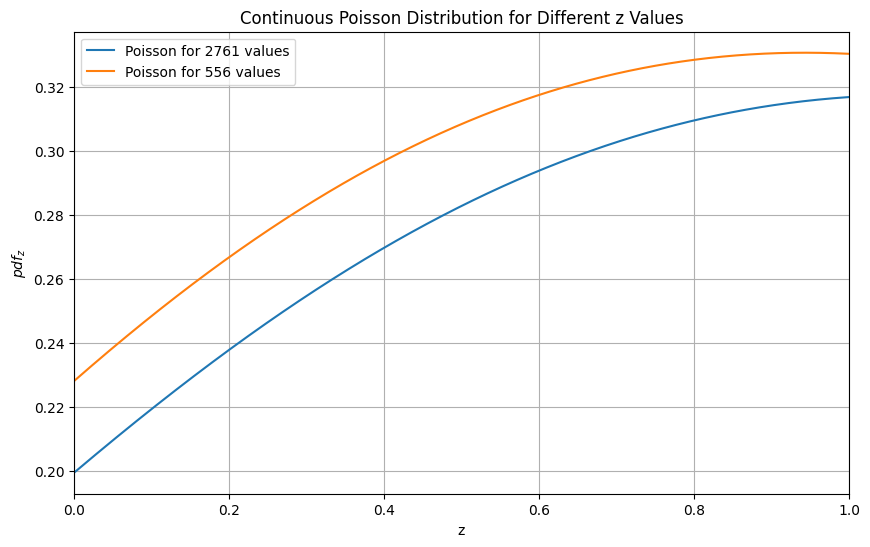

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame setup (replace with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Filter the main data
filtered_df = df[(df["dm_pos"] == 10) & (df["dm_neg"] == 1)]

# Normalize the data to the range of [0, 1]
filtered_df["z_gen_pos"] = filtered_df["z_gen_pos"].clip(0, 1)
filtered_df["z_gen_neg"] = filtered_df["z_gen_neg"].clip(0, 1)

# Poisson distribution function
def poisson_continuous(x, lam):
    return lam**x * np.exp(-lam) / np.array([np.math.gamma(xi + 1) for xi in x])

# Function to calculate lambda from z (logarithmic relationship)
def lambda_func(z):
    return np.log(1 + 5 * z)  # Logarithmic relationship scaled to [1, 10]

# Function to calculate the PDF values using Poisson distribution
def poisson_pdf(z_vals, x):
    y = np.zeros_like(x)
    for z in z_vals:
        lam = lambda_func(z)
        y += poisson_continuous(x, lam)
    y /= len(z_vals)  # Normalize by the number of z values
    return y

# Function to plot the Poisson PDF
def plot_poisson(z_vals, x):
    y = poisson_pdf(z_vals, x)
    plt.plot(x, y, label=f'Poisson for {len(z_vals)} values')

# Range for x values from 0 to 1
x = np.linspace(0.0, 1.0, 1000)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot Poisson distribution for filtered data
plot_poisson(filtered_df[filtered_df["process"] == "tt"]["z_gen_pos"].tolist(), x)
plot_poisson(filtered_df[filtered_df["process"] == "hh"]["z_gen_pos"].tolist(), x)
plt.xlim((0, 1))
plt.xlabel('z')
plt.ylabel('$pdf_{z}$')
plt.title('Continuous Poisson Distribution for Different z Values')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde

# Example DataFrame setup (replace with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Filter the main data
filtered_df = df[(df["dm_pos"] == 10) & (df["dm_neg"] == 1)]

# Normalize the data to the range of [0, 1]
filtered_df["z_gen_pos"] = filtered_df["z_gen_pos"].clip(0, 1)
filtered_df["z_gen_neg"] = filtered_df["z_gen_neg"].clip(0, 1)

# Poisson distribution function
def poisson_continuous(x, lam):
    return lam**x * np.exp(-lam) / np.array([np.math.gamma(xi + 1) for xi in x])

# Function to calculate lambda from z (logarithmic relationship)
def lambda_func(z):
    return np.log(1 + 9 * z)  # Logarithmic relationship scaled to [1, 10]

# Function to calculate the PDF values using Poisson distribution and KDE
def poisson_kde_pdf(z_vals, x):
    kde = gaussian_kde(z_vals, bw_method=0.05)  # Kernel density estimation with bandwidth
    y = np.zeros_like(x)
    for xi in x:
        weight = kde(xi)
        lam = lambda_func(xi)
        y += weight * poisson_continuous(x, lam)
    y /= np.trapz(y, x)  # Normalize by the integral of the PDF
    return y

# Function to plot the Poisson PDF using KDE for better structure
def plot_poisson_kde(z_vals, x):
    y = poisson_kde_pdf(z_vals, x)
    plt.plot(x, y, label=f'Poisson KDE for {len(z_vals)} values')

# Range for x values from 0 to 1 with higher resolution
x = np.linspace(0.0, 1.0, 5000)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot Poisson distribution for filtered data using KDE
plot_poisson_kde(filtered_df[filtered_df["process"] == "hh"]["z_gen_pos"].tolist(), x)

plt.xlim((0, 1))
plt.xlabel('z')
plt.ylabel('$pdf_{z}$')
plt.title('Continuous Poisson Distribution with KDE for Different z Values')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
from scipy.stats import norm


# Filter the main data
filtered_df = df[(df["dm_pos"] == 10) & (df["dm_neg"] == 1)]

# Normalize the data to the range of [0, 1]
filtered_df["z_gen_pos"] = filtered_df["z_gen_pos"].clip(0, 1)
filtered_df["z_gen_neg"] = filtered_df["z_gen_neg"].clip(0, 1)


# Log-Normalverteilungsfunktion
def log_normal(x, mu, sigma):
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

# Berechne mu aus dem Modus und sigma
def calculate_mu(modus, sigma):
    return np.log(modus) + sigma**2

# Werte für modus und sigma
#modus = 0.01
# sigma_values = [0.1, 0.25, 0.5, 0.75]
#sigma_values = [0.75]

# Bereich für x-Werte von 0.01 bis 3.5 (außer 0, da ln(0) nicht definiert ist)
x = np.linspace(0.0, 1.0, 1000)

# Plot erstellen
plt.figure(figsize=(10, 6))


def sigma_func(z):
    a, b = 0.01671513800492873, -0.7880525635296838
    return a * z**b *3

def kde(z_vals):
    def func(x):
       values = []
        for z in z_vals:
            if z <= 0.5:
                sigma = sigma_func(z)
                mu = np.log(z) + sigma**2
                values.append(log_normal(x, mu, sigma))
            else:
                sigma = sigma_func(1 - z)
                mu = np.log(1 - z) + sigma**2
                vals = log_normal(-(x - (1 - z)) + z, mu, sigma)
                values.append(vals)
        return sum(values)
    return func

def plot_kde(z_vals, x):
    y = kde(z_vals)(x)
    plt.plot(x, y, label=f'KDE for {len(z_vals)} values')

# plot_kde([*(30 * [0.00001]), 0.1, 0.2, 0.3, 0.34, 0.35, 0.7, 0.9, 0.9, 0.95, 0.998, 1.0], x)
#plot_kde(filtered_df[filtered_df["process"] == "hh"]["z_gen_pos"].tolist(), x)
#plot_kde(filtered_df[filtered_df["process"] == "dy"]["z_gen_pos"].tolist(), x)
plot_kde([0.1], x)

plt.xlim((0, 1))
plt.xlabel('z')
plt.ylabel('$pdf_{z}$')
plt.title('Log-Normalverteilung für verschiedene Modus-Werte')
plt.legend()
plt.grid(True)
plt.show()

IndentationError: unexpected indent (132644192.py, line 39)